In [3]:
class InErr(Exception):
    def __init__(self, actual_size ):
        self.desired = actual_size
        
    def __str__(self):
        return "The desired size is "+str(self.desired)+" and the received size is "+str(self.got) 
    
    def gotval(self,got):
        self.got = got

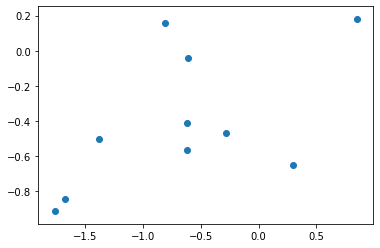

In [80]:
import numpy as np
import matplotlib.pyplot as plt
npts = 400
ls = list(range(1,101))
x = np.random.choice( ls, size=npts )
y = 3*x + np.random.uniform(low=0,high=20,size=x.shape[0])
data = np.vstack((x,y)).T
# plt.scatter(x,y)
y = 4*x
data2 = np.vstack((x,y)).T

fit_data1 = np.array([[-1.76586391869932,-0.91392532736063],
[-1.38289715070277,-0.502829586621374],
[-0.618779826909304,-0.408257109113038],
[-0.279251442290843,-0.469211537856609],
[-0.617764072492719,-0.565175158903003],
[-1.67860568827018,-0.845086738467216],
[-0.611263827420771,-0.0395743944682181],
[0.296234296169132,-0.65233340440318],
[-0.81200323626399,0.160686868242919],
[0.851336521562189,0.182786221150309]], dtype=np.double)

fit_data2 = np.array([[0.82154324837029,1.02822455205023,0.816867631161585,1.43172957585193,-0.211356920888647],
[0.158811071654782,0.477836100151762,0.628777307458222,0.468563350616023,0.15094120730646],
[0.267525406787172,0.853766672546044,1.29445294477046,0.975737085798755,0.440686272224411],
[0.522608259925619,0.845700737321749,0.67850524187088,0.878021024400368,-0.167195495450869],
[0.219620030373335,1.16526521905325,1.63568942062557,0.909664262318984,0.470424201572314],
[0.673377133207396,1.19049952598289,1.30780894239433,1.46406368282624,0.117309416411445],
[0.892852986464277,1.47818981576711,0.796975912293419,1.10449206945486,-0.68121390347369],
[0.951930664712563,1.78414147952572,1.21043186890893,1.33015171880834,-0.573709610616788],
[0.227902331855148,0.410953311249614,0.388058034703135,0.432909387163818,-0.0228952765464783],
[0.951077690348029,1.02105829492211,0.699801568407565,1.58089865418151,-0.321256726514548],
[0.863840530393645,1.56053472682834,1.46988949552178,1.63703582948074,-0.0906452313065529],
[0.482901901938021,1.42585238837637,1.58202284877189,1.12197426427156,0.156170460395515],
[0.986740520223975,1.26958538452163,0.516681112116203,1.22057676804252,-0.752904272405431],
[0.0473130554892123,0.123702708631754,0.414710842771456,0.385634245118126,0.291008134139702],
[0.953716051299125,1.65761092072353,1.11976985237561,1.36959103425033,-0.537841068347916],
[0.724201666424051,1.6814508147072,1.90844193147495,1.67539444961585,0.226991116767749],
[0.505472009070218,1.31346420105547,0.831049491651356,0.528529308736324,-0.482414709404111],
[0.143367370823398,1.00356849376112,0.972464806400239,0.255631054285914,-0.0311036873608828],
[0.971689920173958,1.56363604986109,1.38873743615113,1.76848122663796,-0.174898613709956],
[0.999588234815747,1.98116715671495,1.6615385315381,1.67954784445465,-0.319628625176847],], dtype=np.double)

# fit_data2.mean( axis=0 )
fit_data1_0m = fit_data1 - fit_data1.mean(0)
data0m = data - data.mean(0)
data20m = data2 - data2.mean(0)
sc = plt.scatter(fit_data1[:,0],fit_data1[:,1])

In [8]:
class copied_PCAN:
    def __init__(self,input_dim, output_dim=1, _debug=False, _debug_block=None, _debug_allow=None ):
        self.idim = input_dim
        self.odim = output_dim
        self.weights = np.random.normal( size=(self.odim,self.idim))
        self.excep = InErr( self.idim )
        self._d = _debug
        if(self._d):
            if( _debug_block and _debug_allow ):
                raise Exception("_debug block and _debug allow cannot be used together.")
            else:
                self._db = _debug_block
                self._da = _debug_allow
                
    def __dprint(self,print_string,ident):
        if(self._d):
            if(self._db and ident in self._db):
                pass
            else:
                if( not(self._da) or (self._da and ident in self._da)):
                    print(str(ident)+":  "+print_string)
                    
    def feed_one_row(self,inp,lr):
        self.__dprint("input= "+str(inp),0)
        Y = self.transform(inp)
        self.__dprint("Y= "+str(Y),0)
        
        self.__dprint("weights= "+str(self.weights),1)
        self.__dprint("outer(Y,X)= "+str(np.outer(Y,inp)),1)
        self.__dprint("outer(Y,Y)= "+str(np.outer(Y,Y)),1)
        self.__dprint("tril(__)= "+str(np.tril(np.outer(Y,Y))),1)
        self.__dprint("__ X weights= "+str(np.dot(np.tril(np.outer(Y,Y)),self.weights)),1)
        dW = ( np.outer(Y,inp) - np.dot(np.tril(np.outer(Y,Y)),self.weights)) * lr 
        
        self.__dprint("dW= "+str(dW),2)
        self.weights += dW
        self.__dprint("W= "+str(self.weights),2)
        
    def feed(self, inp, lr=0.01, epochs = 100):
        for i in range(epochs):
#             self.__dprint("epochs= "+str(i),6)
            for row in range(inp.shape[0]):
                self.feed_one_row(inp[row,:],lr)
                
    def transform(self, X):
        return np.dot( self.weights, X )
    
    def inverse_transform(self,Y):
        return np.dot( self.weights.T, Y )
    
    def get_components(self):
        return self.weights
                
                

In [9]:
class Ineff_PCAN:
    def __init__(self, input_dim, output_dim=1, _debug=False, _debug_block=None, _debug_allow=None ):
        self.idim = input_dim
        self.odim = output_dim
        self.weights = np.random.normal( size=(self.idim,self.odim), scale=0.01 )
        self.excep = InErr( self.idim )
        self._d = _debug
        if(self._d):
            if( _debug_block and _debug_allow ):
                raise Exception("_debug block and _debug allow cannot be used together.")
            else:
                self._db = _debug_block
                self._da = _debug_allow
                
    def __dprint(self,print_string,ident):
        if(self._d):
            if(self._db and ident in self._db):
                pass
            else:
                if( not(self._da) or (self._da and ident in self._da)):
                    print(str(ident)+":  "+print_string)
    
    def feed_one_row(self,inp,lr):
        if( inp.shape[0] != self.idim ):
            self.excep.gotval(inp.shape[0])
            raise self.excep
            
        self.__dprint("wt*w = "+str(self.weights.T.dot(self.weights)),4)
        self.__dprint("weights "+str(self.weights),0)
        y = inp.dot( self.weights )
        self.__dprint("output "+str(y),1)
        
        del_w = np.zeros_like( self.weights )
        for i in range(del_w.shape[0]):
            for j in range(del_w.shape[1]):
                weights_sum = 0
                for k in range(j+1):
                    weights_sum += self.weights[i,k] * y[k]
                del_w[i,j] = lr * ( (y[j]*inp[i]) - (y[j]*(weights_sum)) )
        self.__dprint("del_w = "+str(del_w),2)
        
        self.weights += del_w
        self.__dprint("weights = "+str(self.weights),3)
        self.__dprint("wt*w = "+str(self.weights.T.dot(self.weights)),4)
        
    def feed(self, inp, lr=0.01, epochs = 100):
        for i in range(epochs):
            self.__dprint("epochs= "+str(i),6)
            for row in range(inp.shape[0]):
                self.feed_one_row(inp[row,:],lr)

    def get_components(self):
        return self.weights.T
    
#     def normalize_components(self):
#         mini = self.weights.min(axis=1)
#         print(self.weights,mini)
#         normalized = np.empty_like( self.weights )
#         for i in range(self.weights.shape[1]):
#             normalized[:,i] = self.weights[:,i] / mini[i]
#         return normalized.T
             

In [75]:
def hebbian_pca(data, number_of_components =8, w =[], lr =0.001, iterations =100):
    '''
    input: data (N x d)        ( ASSUMPTION:  data.mean(0) = ZERO !!)
    output: first 'number_of_components' of eigenvectors 'w'
    
    '''
    npc = number_of_components
    if np.array(w).shape[0] > 0: pass # do better checking 
    else: w = np.random.uniform(-1,1,(data.shape[1],npc))

    for iters in range(iterations):
        for x in data:
            y = np.dot(w.T,x[:,True])
            Ymat= []
            for i in range(npc):
                Ymat += [y]
            Y_mat = np.array(Ymat)[:,:,0]
            tril_mat = np.tril(Y_mat,k=0).T
            S_mat = np.dot(w,tril_mat)
            Xmat= []
            for i in range(npc):
                Xmat += [x]
            X_mat = np.array(Xmat).T
            dw = lr * y[:,0]* (X_mat - S_mat)
            w += dw
    return w

hebbian_pca(data0m, 1, iterations=1000 )

/home/harish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in add


array([[nan],
       [nan]])

In [79]:
import numpy as np
import pandas as pd

# ina = np.array([[1,2,6],[2,4,12],[3,7,20],[3,8,22]])
# inp = np.array([[1,2],[2,4],[3,6],[4,8]])
pca = Ineff_PCAN( input_dim = 2, output_dim= 1, _debug=False, _debug_allow=[6] )
pca.feed(fit_data1_0m, epochs = 300)
print(pca.get_components())

[[0.95572324 0.29464509]]


In [78]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# ina = np.array([[1,2,6],[2,4,12],[3,7,20],[3,8,22]])
pca = PCA( n_components = 1 )
pca.fit(fit_data1_0m)
print(pca.components_)

[[0.95571093 0.29430701]]
